In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib


In [ ]:
pip install kaggle


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


imbalanced data to balanaced data

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


it is balanced now

In [ ]:
from collections import Counter
print(Counter(y_resampled))


Counter({0: 284315, 1: 284315})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56739    11]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
import joblib

joblib.dump(model, "model.pkl")


['model.pkl']

In [ ]:
input_data = [[1.191857, 0.266151, 0.166480, 0.448154, 0.060018,
               -0.082361, -0.078803, 0.085102, -0.255425, -0.166974,
               1.612727, 1.065235, 0.489095, -0.143772, 0.635558,
               0.463917, 0.496358, 0.139247, -0.119459, -0.461681,
               -0.646965, 0.207971, 0.025791, 0.403993, 0.251412,
               -0.018307, 0.277838, -0.110474, 406.0, 2.69]]

model.predict(input_data)  # → should return [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from sklearn.preprocessing import StandardScaler

# The input data needs to be a DataFrame with the same columns as X_resampled
# Create a DataFrame from the input list
input_df = pd.DataFrame(input_data, columns=X_resampled.columns)

# Scale the 'Amount' and 'Time' columns using the scaler fitted on the training data
# Ensure the scaler is fitted before this step (from previous cell execution)
input_df[['Amount', 'Time']] = scaler.transform(input_df[['Amount', 'Time']])

# Make prediction
prediction = model.predict(input_df)
print(f"The prediction for the input data is: {prediction[0]}")

The prediction for the input data is: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'Amount' and 'Time' are the last two columns in your original data
# You might need to adjust the column indices if your data structure is different
scaler = StandardScaler()

# Fit the scaler on the original data's 'Amount' and 'Time' columns
# Use X_resampled to fit the scaler to ensure consistency with the training data
scaler.fit(X_resampled[['Amount', 'Time']])

# Scale the 'Amount' and 'Time' from the input_data
amount_time_input = [[input_data[0][-2], input_data[0][-1]]] # Extract 'Amount' and 'Time'
scaled_input = scaler.transform(amount_time_input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.predict_proba(input_df)


array([[1., 0.]])

In [ ]:
df[df['Class'] == 1].describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")


V14: 0.2141
V10: 0.1243
V12: 0.1140
V4: 0.1082
V17: 0.0862
V3: 0.0724
V11: 0.0501
V16: 0.0421
V2: 0.0397
V9: 0.0270


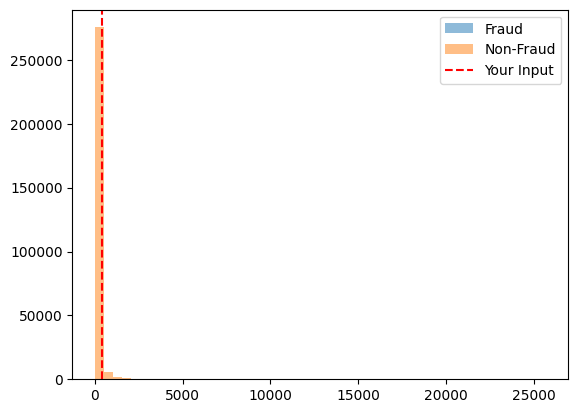

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraud')
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Non-Fraud')
plt.axvline(x=input_data[0][-2], color='red', linestyle='--', label='Your Input')
plt.legend()
plt.show()


In [ ]:
df[(df['Amount'] < 1000) & (df['Class'] == 1)].shape


(483, 31)

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56796    11]
 [    0 56916]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56807
           1       1.00      1.00      1.00     56916

    accuracy                           1.00    113723
   macro avg       1.00      1.00      1.00    113723
weighted avg       1.00      1.00      1.00    113723



In [ ]:
model.score(X_test, y_test)


0.9999032737440975

In [ ]:
model.predict_proba(input_df)

array([[1., 0.]])

In [ ]:
df[df['Class'] == 1].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


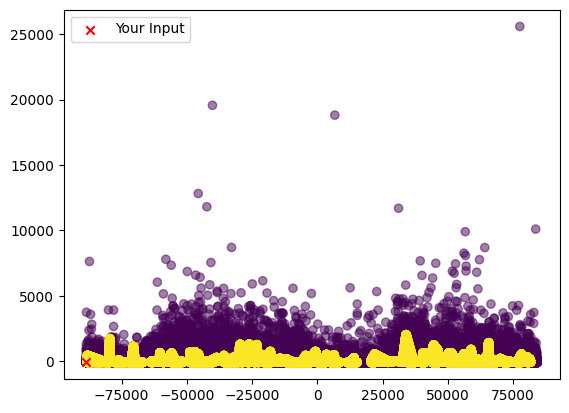

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, alpha=0.5)
input_pca = pca.transform(input_df)
plt.scatter(input_pca[0, 0], input_pca[0, 1], color='red', marker='x', label='Your Input')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
distance = euclidean_distances(X_res, input_df)
nearest_indices = np.argsort(distance.ravel())[:5]
print(y_res[nearest_indices])  # Are the closest points frauds?


5     0
1     0
6     0
9     0
17    0
Name: Class, dtype: int64


In [ ]:
input_df_modified = input_df.copy()
input_df_modified['V14'] += 1.5  # example tweak


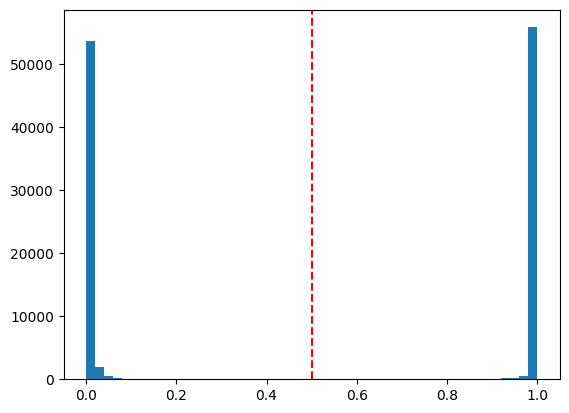

In [ ]:
fraud_scores = model.predict_proba(X_test)[:, 1]
plt.hist(fraud_scores, bins=50)
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold')


In [ ]:
fraud_scores = model.predict_proba(X_test)[:, 1]


In [ ]:
proba = model.predict_proba(input_df)[0][1]
is_fraud = 1 if proba > 0.3 else 0  # Adjust based on risk tolerance


In [ ]:
if proba >= 0.8:
    risk_label = 'High Risk (Likely Fraud)'
elif proba >= 0.4:
    risk_label = 'Moderate Risk'
else:
    risk_label = 'Low Risk (Likely Legit)'


In [ ]:
st.metric("Fraud Probability", f"{proba:.2%}")


NameError: name 'st' is not defined

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = joblib.load("model.pkl")

# Set up the app
st.set_page_config(page_title="Fraud Detection App", layout="centered")
st.title("💳 Real-Time Credit Card Fraud Detection")

# Input fields
amount = st.number_input("Transaction Amount (₹)", min_value=0.0, step=1.0)
time = st.number_input("Transaction Time", min_value=0.0, step=1.0)

# Prediction button
if st.button("Detect Fraud"):
    input_data = pd.DataFrame([[amount, time]], columns=["Amount", "Time"])

    # Load or fit your scaler
    scaler = StandardScaler()
    X = pd.read_csv("creditcard.csv").drop("Class", axis=1)
    scaler.fit(X[["Amount", "Time"]])
    input_data[["Amount", "Time"]] = scaler.transform(input_data[["Amount", "Time"]])

    # Get prediction and probability
    prediction = model.predict(input_data)[0]
    proba = model.predict_proba(input_data)[0][1]

    # Define risk label
    if proba >= 0.8:
        risk_label = 'High Risk (Likely Fraud)'
    elif proba >= 0.4:
        risk_label = 'Moderate Risk'
    else:
        risk_label = 'Low Risk (Likely Legit)'

    st.metric("Fraud Probability", f"{proba:.2%}", help=f"Risk level: {risk_label}")

    if prediction == 1:
        st.error("🚨 ALERT: This transaction is predicted as FRAUDULENT.")
    else:
        st.success("✅ This transaction is predicted as LEGITIMATE.")

st.caption("Model based on balanced training with ADASYN and RandomForestClassifier.")


2025-07-16 16:48:53.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 16:48:53.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 16:48:53.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 16:48:53.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 16:48:53.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 16:48:53.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 16:48:53.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 16:48:53.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
streamlit run app.py


SyntaxError: invalid syntax (ipython-input-54-507122745.py, line 1)

In [ ]:
import streamlit as st

# Assuming 'proba' and 'risk_label' are already defined from previous cells
st.metric("Fraud Probability", f"{proba:.2%}", help=f"Risk level: {risk_label}")

2025-07-16 15:39:21.332 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 15:39:21.436 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-16 15:39:21.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 15:39:21.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
get_ipython().system('streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py')




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.37.226:8501

  Stopping...
^C


In [ ]:
!streamlit  run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.37.226:8501

  Stopping...
  Stopping...


In [ ]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
!lt --port 8501


/bin/bash: line 1: lt: command not found


In [ ]:
!npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
!npx localtunnel --port 8501 --subdomain fraud-detector-demo


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = joblib.load("model.pkl")

# Set up the app
st.set_page_config(page_title="Fraud Detection App", layout="centered")
st.title("💳 Real-Time Credit Card Fraud Detection")

# Input fields
amount = st.number_input("Transaction Amount (₹)", min_value=0.0, step=1.0)
time = st.number_input("Transaction Time", min_value=0.0, step=1.0)

# Prediction button
if st.button("Detect Fraud"):
    input_data = pd.DataFrame([[amount, time]], columns=["Amount", "Time"])

    # Load or fit your scaler
    scaler = StandardScaler()
    X = pd.read_csv("creditcard.csv").drop("Class", axis=1)
    scaler.fit(X[["Amount", "Time"]])
    input_data[["Amount", "Time"]] = scaler.transform(input_data[["Amount", "Time"]])

    # Get prediction and probability
    prediction = model.predict(input_data)[0]
    proba = model.predict_proba(input_data)[0][1]

    # Define risk label
    if proba >= 0.8:
        risk_label = 'High Risk (Likely Fraud)'
    elif proba >= 0.4:
        risk_label = 'Moderate Risk'
    else:
        risk_label = 'Low Risk (Likely Legit)'

    st.metric("Fraud Probability", f"{proba:.2%}", help=f"Risk level: {risk_label}")

    if prediction == 1:
        st.error("🚨 ALERT: This transaction is predicted as FRAUDULENT.")
    else:
        st.success("✅ This transaction is predicted as LEGITIMATE.")

st.caption("Model based on balanced training with ADASYN and RandomForestClassifier.")

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.37.226:8501

⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://ninety-bottles-live.loca.lt
  Stopping...
^C


In [ ]:
!yes | npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏npm warn exec The following package was not found and will be installed: localtunnel@2.0.2
⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://happy-mirrors-change.loca.lt
y
^C


In [ ]:
!yes | streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.37.226:8501

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://every-friends-occur.loca.lt
  Stopping...
^C


In [ ]:
!yes | streamlit run app.py & npx localtunnel --port 8501 --subdomain fraud-detector-demo




⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.37.226:8501

⠼⠴⠦⠧⠇⠏your url is: https://fraud-detector-demo.loca.lt
  Stopping...
^C
